In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
dataset = pd.read_csv('./energy_predict_data/data_prehandle/4_fill_null/whole/filled_by_kmeans/predict_data_e_train.csv')
# dataset = dataset[dataset['vehicle_id']  == 9]
header = dataset.columns.values.tolist()
dataset.describe()
dataset.dtypes

vehicle_id           float64
charge_start_time    float64
charge_end_time      float64
charge_duration      float64
mileage              float64
delta_mileage        float64
charge_start_soc     float64
charge_end_soc       float64
charge_delta_soc     float64
charge_start_U       float64
charge_end_U         float64
charge_start_I       float64
charge_end_I         float64
charge_max_temp      float64
charge_min_temp      float64
charge_delta_temp    float64
charge_energy        float64
dtype: object

/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


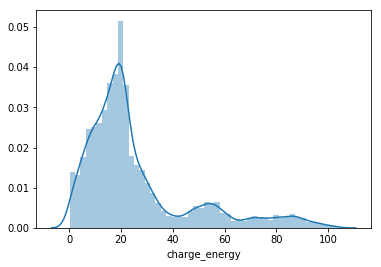

In [3]:
sns.distplot(dataset['charge_energy']);

### 特征选择

In [4]:
features = ['charge_duration', 
            'delta_mileage',
            'charge_start_soc', 
            'charge_delta_soc', 
            'charge_end_soc',
            'charge_start_U',
            'charge_start_I',
            'charge_max_temp',
            'charge_min_temp',
            'charge_delta_temp']
label = header[16]
features, label

(['charge_duration',
  'delta_mileage',
  'charge_start_soc',
  'charge_delta_soc',
  'charge_end_soc',
  'charge_start_U',
  'charge_start_I',
  'charge_max_temp',
  'charge_min_temp',
  'charge_delta_temp'],
 'charge_energy')

### 数据标准化

In [5]:
X = dataset[features]
y = dataset[label]

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X.astype(np.float64))

### 选择最优模型

In [6]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.svm import SVR
from xgboost import XGBRegressor

estimator_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor(solver='lbfgs', max_iter=1000),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    LinearSVR(),
    NuSVR(),
    SVR(),
    XGBRegressor()
]

cv_split = ShuffleSplit(n_splits=6, train_size=0.75, test_size=0.25, random_state=13)
df_columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Test Accuracy Std', 'Comsumed Time']
df = pd.DataFrame(columns=df_columns)

row_index = 0
for estimator in estimator_list:
    df.loc[row_index, 'Name'] = estimator.__class__.__name__
    df.loc[row_index, 'Parameters'] = str(estimator.get_params())
    cv_results = cross_validate(estimator, X, y, cv=cv_split)
    df.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    df.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
    df.loc[row_index, 'Test Accuracy Std'] = cv_results['test_score'].std()
    df.loc[row_index, 'Comsumed Time'] = cv_results['fit_time'].mean()
    print(row_index, estimator.__class__.__name__)
    print(cv_results['test_score'])
    row_index += 1
df = df.sort_values(by='Test Accuracy Mean', ascending=False)
df.to_csv('./energy_predict_data/cross_validate/score.csv', index=False)
df

/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0 LinearRegression
[ 0.8766394   0.87517044  0.87060959  0.88103638  0.87260396  0.88030763]
1 DecisionTreeRegressor
[ 0.98986593  0.9942319   0.99239181  0.9948659   0.99128665  0.99089655]
2 GradientBoostingRegressor
[ 0.99067713  0.99134765  0.99075407  0.98956507  0.9898087   0.98666775]
3 MLPRegressor
[ 0.99139993  0.99241034  0.99256762  0.99368872  0.99119527  0.99054003]
4 AdaBoostRegressor
[ 0.94913585  0.9474208   0.94889354  0.95096957  0.95096738  0.95093738]
5 BaggingRegressor
[ 0.99395576  0.99582115  0.99567974  0.99574113  0.99348443  0.992611  ]
6 ExtraTreesRegressor
[ 0.99396633  0.99569659  0.99583936  0.99551598  0.99382367  0.99344887]
7 RandomForestRegressor
[ 0.99347314  0.99600935  0.99570742  0.99406558  0.99364325  0.99244436]
8 LinearSVR
[ 0.85731064  0.85056182  0.84877114  0.85912768  0.84745909  0.8586633 ]
9 NuSVR
[ 0.9325262   0.93531531  0.9366662   0.93183178  0.92706338  0.93960208]
10 SVR
[ 0.93346836  0.93657061  0.93714844  0.93217477  0.92740425  

,Name,Parameters,Train Accuracy Mean,Test Accuracy Mean,Test Accuracy Std,Comsumed Time
6,ExtraTreesRegressor,"{'bootstrap': False, 'criterion': 'mse', 'max_...",1,0.994715,0.000985506,0.102913
5,BaggingRegressor,"{'base_estimator': None, 'bootstrap': True, 'b...",0.998879,0.994549,0.00126222,0.198187
7,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.998899,0.994224,0.00125707,0.196331
1,DecisionTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",1,0.992256,0.00179045,0.0326154
3,MLPRegressor,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.996449,0.991967,0.00103883,9.26397
2,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",0.993029,0.989803,0.0015243,0.233652
11,XGBRegressor,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.992812,0.989764,0.00158779,0.153949
4,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",0.951639,0.949721,0.00134846,0.350389
10,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.937389,0.93441,0.00397944,0.769866
9,NuSVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.936619,0.933834,0.0039801,0.579691


### 搜索模型最优参数

In [7]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
import numpy as np 
import time

model = ExtraTreesRegressor()

cv_split = ShuffleSplit(n_splits=6, train_size=0.7, test_size=0.2)
param_grid = dict(
    max_depth = [4, 5, 6, 7, 8, 9, 10],
    min_samples_leaf = [1, 2, 3, 4, 5],
    min_samples_split = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
#     learning_rate = np.linspace(0.03, 0.3, 10),
    n_estimators = [50, 100, 200, 300]
)
start = time.time()
grid = GridSearchCV(model, param_grid, cv=cv_split, scoring='neg_mean_squared_error')
grid.fit(X, y)
print('GridSearchCV process use %.2f seconds'%(time.time()-start))

GridSearchCV process use 1438.27 seconds


In [8]:
print(grid.best_params_)
print(grid.best_score_)
print(len(grid._get_param_iterator()))

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'n_estimators': 50}
-29.204392866
840
